이전 모델에서 과소적합이 남아있었다.
이 문제를 해결해보자.

이전 모델은 하나의 특성을 이용해 선형 회귀 모델을 훈련시켰다. 이번에는 길이를 포함해 높이, 두께를 이용하여 여러 개의 특성을 사용해 선형 회귀를 해보자. 이때 여려 개의 특성을 사용한 선형 회귀를 **'다중 회귀(multiple regression)'**라고 부른다.

이전처럼 1개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 직선이다. 하지만 특성이 2개가 되면 선형 회귀는 평면을 학습한다. 즉, 3차원 공간을 형성하게 된다. 특성이 3개인 경우는 3차원 공간 이상이기 때문에 우리가 그리거나 상상할 수는 없다. 이때 중요한 점은 **선형 회귀를 단순한 직선이나 평면으로 생각해 성능이 무조건 낮다고 오해하면 안된다**는 점이다. 

**특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 모델을 표현할 수 있다.** 우리는 농어의 길이뿐만 아니라 농어의 높이와 두께도 함께 사용할 것이다. 이전 처럼 3개의 특성을 각각 제곱하여 추가할 것이고 각 특성을 서로 곱해서 또 다른 특성을 만들 예정이다. 이렇게 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 **'특성 공학(feature engineering)'**이라고 부른다.

이전과 달리 농어의 특성이 3개로 늘어났기 때문에 데이터를 복사해 붙여넣는 일도 번거롭다. 이럴때 판다스를 사용하면 간단하게 인터넷에서 데이터를 가져올 수 있다.

**'판다스(pandas)'**는 유명한 데이터 분석 라이브러리이다. **'데이터프레임(dataframe)'**은 판다스의 핵심 데이터 구조이다. 넘파이 배열과 비슷하게 다차원 배열을 다룰 수 있지만 훨씬 많은 기능을 제공한다. 또한 데이터프레임은 넘파이 배열로 쉽게 바꿀 수 있다.

판다스 데이터프레임을 만들기 위해 많이 사용하는 파일은 CSV 파일이다. CSV 파일은 콤마로 나누어져 있는 텍스트 파일이다.

CSV 파일을 읽어오려면 판다스의 **read_csv() 함수**에 주소를 넣어주면 된다. read_scv() 함수로 데이터프레임을 만든 후 **to_numpy() 메서드**를 사용해 넘파이 배열로 바꾼다.

In [1]:
import pandas as pd # pd는 관례적으로 사용하는 판다스의 별칭이다.
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
# print(perch_full)

타깃 데이터는 이전과 동일한 방식으로 준비한다.

In [2]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

perch_full과 perch_weight를 **훈련 세트와 테스트 세트로 나눈다**.

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

이제 이 데이터를 사용해 새로운 특성을 만들어보자.

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다. 이런 클래스를 **'변환기(transformer)'**라고 부른다. 변환기 클래스는 모두 fit(), transform() 메서드를 제공한다.

* 앞서 배운 LinearRegression 같은 사이킷런의 모델 클래스는 **'추정기(estimator)'**라고 부른다.

우리는 sklearn.preprocessing 패키지에 포함된 **PolynomialFeatures 변환기**를 사용할 것이다.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

2개의 특성 2와 3으로 이루어진 샘플 하나를 적용해보자. fit(), transform() 메서드를 차례대로 호출한다.
* **훈련(fit)을 해야 변환(transform)이 가능하다.** 사이킷런의 일관된 api 때문에 두 단계로 나뉘어져 있다. 두 메서드를 하나로 붙인 fit_transform() 메서드도 있다.
* fit(): 새롭게 만들 특성 조합을 찾는다.
* transform(): 실제로 데이터를 변환한다.

In [5]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


fit() 메서드 호출을 보면 변환기는 입력 데이터를 변환하는 데 타깃 데이터가 필요하지 않는다. 따라서 모델 클래스와 다르게 fit() 메서드에 입력 데이터만 전달했다.

출력 결과를 보면 2개의 특성을 가진 샘플 [2, 3]이 6개의 특성을 가진 샘플 [1. 2. 3. 4. 6. 9.]으로 바뀌었다.

PolynomialFeatures 클래스는 **기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가**한다. 즉, 2와 3을 각각 제곱하여 4와 9가 추가되고, 2와 3을 곱한 6이 추가된다. 이때 1은 어떤 값일까?
* 무게 = a × 길이 + b × 높이 + c × 두께 + d × 1

선형 방정식의 **절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다.** 이렇게 높고 보면 특성은 **(길이, 높이, 두께, 1)**이 된다. 하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없다. **include_bias = False**로 지정하여 다시 특성을 변환해보자.

In [6]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

절편을 위한 항이 제거되고 특성의 제곱과 특성끼리 곱한 항만 추가되었다.
* include_bias = False로 지정하지 않아도 **사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시한다.** 하지만 혼돈을 피하기 위해 명시적으로 지정했다.

이제 이 방식으로 train_input에 적용해보고 해당 배열의 크기를 확인해보자.

In [7]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


PolynomialFeatures 클래스는 9개의 특성이 어떻게 만들어졌는지 확인할 수 있다. 
**get_feature_names() 메서드**를 호출하면 9개의 특성이 각각 어떤 입력의 조합으로 만드어졌는지 알려준다.
* x0은 첫번째 특성, x1은 두번째 특성을 의미한다.

In [8]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

이제 테스트 세트를 변환하자.

In [9]:
test_poly = poly.transform(test_input)

PolynomialFeatures 클래스는** fit() 메서드에서 만들 특성의 조합을 준비**하고 별도의 통계 값을 구하진 않는다. 따라서 테스트 세트를 따로 변환해도 된다. 하지만 **훈련 세트를 기준으로 테스트 세트를 변화하는 습관**을 들이는게 좋다.

**다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다.** 단지 여러 개의 특성을 사용해 선형 회귀를 수행하는 것이다. 이제 train_poly를 이용해 모델을 훈련시켜보자.

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


농어의 길이뿐만 아니라 높이와 두께를 모두 사용했고 각 특성을 제곱하거나 서로 곱해서 다항 특성을 더 추가했다. 즉, **특성이 늘어나면 선형 회귀의 능력은 매우 강하다는 것을 알 수 있다.**

테스트 세트에 대한 점수도 확인해보자.

In [11]:
print(lr.score(test_poly, test_target))

0.9714559911594132


이전에 있던 과소적합 문제는 더 이상 나타나지 않았다. 

이번에는 특성을 더 많이 추가해보자. PolynomialFeatures 클래스의 degree 매개변수를 사용하면 필요한 고차항의 최대 차수를 지정할 수 있다. 5제곱까지 특성을 만들보자.

In [12]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


이제 모델을 훈련시키고 평가해보자.

In [13]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999991096

In [14]:
lr.score(test_poly, test_target)

-144.40579242335605

훈련 세트의 점수는 거의 만점에 가깝지만 테스트 세트의 점수는 아주 큰 음수이다. 

**특성의 개수를 크게 늘리면 선형 모델은 아주 강력해진다.** 훈련 세트에 대해 거의 완벽하게 학습할 수 있다. 하지만 이런 모델은 **훈련 세트에 너무 과대적합**되므로 테스트 세트에서는 형편없는 점수를 만든다.

* 여기서 사용한 훈련 세트의 샘플 개수는 42개이다. 42개의 샘플을 55개의 특성으로 훈련하면 완벽하게 학습할 수 있는 것이 당연하다.

이 문제를 해결하려면 다시 특성을 줄일 수도 있겠지만 과대적합을 줄이는 다른 방법을 사용할 수 있다. 그 방법을 지금부터 알아보도록 하자.

**'규제(regularization)'**는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다. 즉, 모델이 훈련 세트에 과대적합되지 않도록 만드는 것이다. **선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일**이다.

앞서 55개의 특성으로 훈련한 선형 회귀 모델의 계수를 규제하여 훈련 세트의 점수를 낮추고 테스트 세트의 점수를 높여보자.

2장에서 보았듯 특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값도 차이가 나게 된다. 일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않을 것이다. **따라서 규제를 적용하기 전에 먼저 정규화를 해야한다.**

이전에는 평균과 표준편차를 직접 구해 특성을 표준점수로 바꾸었지만 이번에는 사이컷런에서 제공하는 **StandardScaler 클래스**를 사용하자. 이 클래스도 변환기중 하나이다.

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

StandardScaler 클래스의 객체를 만들고 train_poly를 사용해 이 객체에 훈련시킨다. 
이전에 했던 것 처럼 **훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야한다.**
* 훈련 세트에서 학습한 평균과 표준편차는 StandardScaler 클래스 객체의 mean_, scale_ 속성에 저장된다. 특성마다 계산하므로 55개의 평균과 표준편차가 들어있을 것이다.

선형 회귀 모델에 규제를 추가한 모델을 **'릿지(ridge)'**와 **'라쏘(lasso)'**라고 부른다. **릿지는 계수를 제곱한 값을 기준으로 규제를 적용**하고, **라쏘는 계수의 절댓값을 기준으로 규제를 적용**한다. 일반적으로 릿지를 조금 더 선호한다. 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있다.

릿지와 라쏘 모두 sklearn.linear_model 패키지 안에 있다.

앞서 준비한 train_scaled 데이터로 릿지 모델을 훈련해보자.

In [16]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


훈련 세트의 점수가 조금 낮아진 것을 확인할 수 있다. 이번에는 테스트 세트에 대한 점수를 확인하자.

In [17]:
print(ridge.score(test_scaled, test_target))

0.9790693977615398


테스트 세트 점수가 정상으로 돌아왔다. 확실히 많은 특성을 사용했음에도 훈련 세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있다.

릿지와 라쏘 모델을 사용할 때 **규제의 양을 임의로 조절**할 수 있다. 모델 객체를 만들 때 **alpha 매개변수**로 규제의 강도를 조절한다. alpha 값이 크면 규제 강도가 세지므로 계수값을 더 줄이고 조금 더 과소적합되도록 유도한다. alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 휴사해지므로 과대적합될 가능성이 크다.

* alpha 값은 릿지 모델이 **학습하는 값이 아니라 사전에 우리가 지정해야 하는 값이다.** 이렇게 머신러닝 모델이 학습할 수 없고 사람이 아려줘야 하는 파라미터를 **'하이퍼파라미터(hyperparameter)'**라고 부른다. 사이킷런과 같은 머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현된다.

적절한 alpha 값을 찾는 방법은 alpha 값에 대한 R²값의 그래프를 그려보는 것이다. **훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값**이 된다.

그래프를 그려보도록하자.

In [33]:
import matplotlib.pyplot as plt

alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장하자.

In [34]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
count = 0
for alpha in alpha_list:
  # 릿지 모델을 만든다.
  ridge = Ridge(alpha = alpha)
  # 릿지 모델을 훈련한다.
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장한다.  
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

alpha 값을 0.001부터 10배씩 늘렸기 때문에 이대로 그래프를 그리면 그래프 왼쪽이 너무 촘촘해진다. alpha_list에 있는 6개의 값을 **동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현**하자. 즉, 0.001은 -3, 0.01은 -2가 된다.

* 넘파이 로그 함수는 **np.log()**와 **np.log10()**이 있다. 전자는 자연 상수 e를 밑으로 하는 자연로그이고, 후자는 10을 밑으로 하는 상용로그이다.

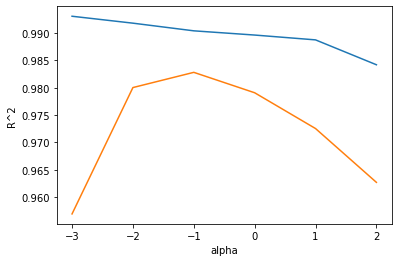

In [26]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

위는 훈련 세트 그래프, 아래는 테스트 세트 그래프이다. 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1(0.1)이다. 따라서 alpha 값을 0.1로 하여 최종 모델을 훈련하자.

In [29]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


이 모델은 훈련세트와 테스트 세트의 점수가 비슷하게 모두 높고 과대적합과 과소적합 사이에서 균형을 맞추고 있다.

이제 라쏘 모델을 훈련해 보자.

In [30]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9897898972080961


라쏘도 과대적합을 잘 억제한 결과를 보여준다. 테스트 세트의 점수도 확인해보자.

In [31]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


테스트 세트의 점수도 릿지만큼 좋다. 라쏘 모델도 alpha 매개변수로 규제의 강도를 조절할 수 있다. 이번에도 alpha 값을 바꿔가며 훈련 세트와 테스트 세트에 대한 점수를 계산해보자.

In [35]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 라쏘 모델을 만든다.
  lasso = Lasso(alpha = alpha, max_iter = 10000)
  # 라쏘 모델을 훈련한다.
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장한다.
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


* 라쏘 모델을 훈련할 때 **ConvergenceWarning이란 경고가 발생**할 수 있다. 사이컷런의 **라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이런 경고가 발생한다.** 이 반복 횟수를 충분히 늘리기 위해 max_iter 매개변수의 값을 10000으로 지정했다. 필요하면 더 늘릴 수 있지만 이 문제에서는 큰 영향을 끼치지 않는다.

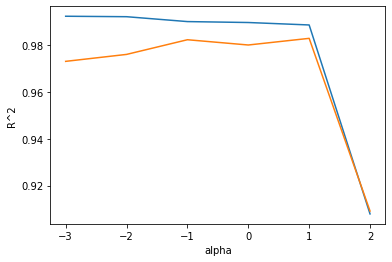

In [36]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

최적의 alpha 값은 1(10)이다. 이 값으로 다시 모델을 훈련해보자.

In [37]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


특성을 많이 사용했지만, 릿지와 마찬가지로 라쏘 모델이 과대적합을 잘 억제하고 테스트 세트의 성능을 크게 높였다. 라쏘 모델은 계수 값을 아예 0으로 만들 수 있다. 라쏘 모델의 계수는 coef_ 속성에 저장되어 있는데 이를 이용해 계수가 0인 것을 헤아려 볼 수 있다.

In [38]:
print(np.sum(lasso.coef_ == 0))

40


* **np.sum() 함수**는 배열을 모두 더한 값을 반환한다. **넘파이 배열에 비교연산자를 사용했을 때 각 원소는 True 또는 False가 된다.** np.sum() 함수는 True는 1, False는 0으로 인식하여 덧셈을 진행한다. 따라서 비교 연산자 에 맞는 원소 개수를 헤아리는 효과를 낸다.

40개나 되는 계수가 0이 된 것을 확인할 수 있었다. 55개의 특성을 모델에 주입했지만 라쏘 모델이 사용한 특성은 15개 밖에 되지 않았다. 이런 특징 때문에 라쏘 모델을 **유용한 특성을 골라내는 용도**로도 사용할 수 있다.

# 정리

핵심 포인트
* 다중 회귀: **여러 개의 특성을 사용하는 회귀 모델**이다. 특성이 많으면 선형 모델은 강력한 성능을 발휘한다.
* 특성 공학: **주어진 특성을 조합해 새로운 특성을 만드는 일련의 작업 과정**이다.
* 릿지: 규제가 있는 선형 회귀 모델이다. 선형 모델의 계수를 작게 만들어 과대적합을 완화시킨다. 비교적 효과가 좋아 널리 사용하는 규제 방법이다.
* 라쏘: 규제가 있는 선형 회귀 모델이다. 릿지와 달리 계수 값을 아예 0으로 만들 수 도 있다.
* 하이퍼파라미터: **머신러닝 알고리즘이 학습하지 않는 파라미터**이다. 이런 파라미터는 **사람이 사전에 지정해야한다.**

핵심 패키지와 함수

pandas
* read_csv():** CSV 파일을 로컬 컴퓨터나 인터넷에서 읽어 판다스 데이터프레임으로 변환하는 함수**이다.

scikit-learn
* PolynomialFeatures: **주어진 특성을 조합해 새로운 특성을 만든다.** **degree는 최고 차수를 지정**하며 기본값은 2이다. **interaction_only**가 True이면 거듭제곱 항은 제외되고 특성 간의 곱셈 항만 추가된다. 기본값은 False이다. **include_bias**가 False이면 절편을 위한 특성을 추가하지 않는다. 기본값은 True이다.
* Ridge: **규제가 있는 회귀 알고리즘인 릿지 회귀 모델을 훈련한다.** **alpha 매개변수로 규제의 강도를 조절**하면 클수록 규제가 세진다. 기본값은 1이다. **solver 매개변수로 최적 모델을 찾기 위한 방법을 지정할 수 있다.** 기본값은 'auto'이며 데이터에 따라 자동으로 선택된다. 'sag'는 사이킷런 0.17 버전에 추가되었으며 확률적 평균 경사 하강법 알고리즘으로 특성과 샘플 수가 많을 때에 빠르고 좋다. 0.19 버전에는 'sag'의 개선 버전인 'saga'가 추가되었다. **random_state**는 solver가 'sag'나 'saga'일 때 넘파이 난수 시드값을 지정할 수 있다.
* Lasso: **규제가 있는 회귀 알고리즘인 라쏘 회귀 모델을 훈련한다.**  최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행해가는 **'좌표 하강법(coordinate descent)'을 사용**한다. max_iter는 알고리즘의 수행 반복 횟수를 지정하며 기본값은 1000이다.